---
title: Data Gathering
format:
    html:
        code-fold: true
---

In [ ]:
library(tidyverse)
library(reticulate)
library(ggplot2)
library(jsonlite)

### Introduction

For this project I will be accessing the Ravelry API for pattern data from the Database. When trying to find larger databases of patterns Ravelry is the only source which is open to the public and not proprietary to an organization. I was still concerned that I was overstepping my bounds in downloading the data so I actually sent an email to the Ravelry API team:

!["Me emailing the API dev and them saying it was cool"](../images/Approval.png)

With this remarkable stamp of approval I began the process of pinging the API for pattern data. This also acted as my introduction to using API's formally and I was lucky to find an article which was an example of how to use API's with the Ravelry API. The article, linked below, was written expressly to help understand how API's worked and I used some of her code in order to set up my first API trials.

["Medium API Website"](https://medium.com/data-science-at-microsoft/how-to-access-an-api-for-first-time-api-users-879002f5f58d)

I had already explored the Ravelry's API and documentation to understand what I was looking for. I had also made a pro account and a read key that I could use to get information and not much else, which was okay since I was just downloading information. This made plugging in the information pretty easy so I did my first request of pattern information.

## Initial Attempt

After giving some general details about how API's work she provided example code which was as follows. I input one of the patterns I'm a fan of to give an example response value.


In [4]:
## I'm working on it
import http.client
import json
import requests
import pandas as pd

## borrowed code
authUsername = "read-e0c523a2ded312cf2cf7cb481460fd47"
authPassword = "oscwhYXQaBG/eh+XNej+Z50xvHiQkjPb6IrzTImB"

#define URL for the API request
url = 'https://api.ravelry.com/patterns/search.json?query={}&page={}&page_size={}'.format("Seafaring Scarf", 1, 1, )
#make the request
r1 = requests.get(url, auth=requests.auth.HTTPBasicAuth(authUsername, authPassword))
#close the connection
r1.close()

print("response output formatted:")
print(json.dumps(json.loads(r1.text), indent=4)) #makes the json more readable

response output formatted:
{
    "patterns": [
        {
            "free": true,
            "id": 968210,
            "name": "Seafaring Scarf in Big Good Wool",
            "permalink": "seafaring-scarf-in-big-good-wool",
            "personal_attributes": null,
            "first_photo": {
                "id": 87973822,
                "sort_order": 1,
                "user_id": 31533,
                "x_offset": -1,
                "y_offset": -35,
                "square_url": "https://images4-f.ravelrycache.com/uploads/purlsoho/652402390/seafaring-scarf-BGW-600-4_square.jpg",
                "medium_url": "https://images4-f.ravelrycache.com/uploads/purlsoho/652402390/seafaring-scarf-BGW-600-4_medium.jpg",
                "thumbnail_url": "https://images4-g.ravelrycache.com/uploads/purlsoho/652402390/seafaring-scarf-BGW-600-4_thumbnail.jpg",
                "small_url": "https://images4-g.ravelrycache.com/uploads/purlsoho/652402390/seafaring-scarf-BGW-600-4_small.jpg",
        


This attempt was very successful and I was able to get a pull of a pattern I liked. I did notice though that this json file did not actually have all the information I was interested in. The file itself seemed to be formatted more with information about the user and its position in the website. Given this was the case I continued into the article.

She expanded upon the API's methods with classes and functions, however she also linked to some other resources which included a package in R specifically designed for use with the Ravelry API. So like most programmers I decided to use another's work for my own benefit.

["Documentation for the ravelRy package"](https://www.rdocumentation.org/packages/ravelRy/versions/0.1.0)

## Successful Attempt

Table of process
- Package overview \
- Description of process \
- Query step \ 
  - Query timing \
  - Query optimization \
    - Query timing \
    - Optimizing by page number \
  - Data collection through Query \
- Get pattern step \
  - Pattern timing \
  - Pattern optimization \
  - Pattern collection through iterative process \
- Summary of remaining data \
- Conclusions \

In [2]:
# Never do work someone has done before
library(ravelRy)
"ravelRy is an R package that provides access to the Ravelry API."
"Ravelry describes itself as a place for knitters, crocheters, designers, spinners, weavers and dyers to keep track of their yarn, tools, project and pattern information, and look to others for ideas and inspiration."

[1] "ravelRy is an R package that provides access to the Ravelry API."

[1] "Ravelry describes itself as a place for knitters, crocheters, designers, spinners, weavers and dyers to keep track of their yarn, tools, project and pattern information, and look to others for ideas and inspiration."

#### Package Overview

The package required the same username and password I had made before, so I established them in my .Renviron folder so they could be accessed without console intervention. This step was required as the package would use the console to ask for username and password which stopped Quarto from rendering.

In [3]:
#Establishing Credentials
#ravelry_auth(key = 'username') 
#ravelry_auth(key = 'password')

Having set it up, I was left to run my query and collect as many data entries as I could reasonably. The database itself has, on my last check, one million two hundred and sixty three thousand nine hundred and eleven patterns. While I do not need all those patterns, I'm looking to get as many as reasonable which would be at maximum one million and minimum one hundred thousand.

#### Description of Process

On my end this collection included two steps, the first of which involved a direct query of the database as if I were doing a search (search_patterns). I could have provided some specifics to the query such as category or type but I was more concerned with having as much information as possible at this stage.

The second step involved using a built-in function of the package to actually get the pattern information which I will be analyzing, this is the stuff that was not available with the traditional API pull. Interestingly this step took more time to process than the previous and I did some experimenting to optimize the steps. I will mention that and more after I complete the demo of the data gathering process.

## Query Step
And thus I began the process of querying data optimally and maximally.

#### Query Timing
I am starting but doing some tests on query time in comparison to amount and so I took the length step of doing a for loop for each 10 queries. There is currently an abridged amount but the pattern should hold and I will prove that once I can process better.

In [4]:
query_times <- c()
start_time <- Sys.time()
for(i in 1:250){
  n_query <- 10*i
  query_start_time <- Sys.time()
  search_results <- search_patterns(query = '',page_size = n_query)
  query_results_time <- Sys.time()
  query_times <- c(query_times,query_results_time - query_start_time)
}
end_time <- Sys.time()

#print("This test took " + str(end_time - start_time) + " seconds to run")
# this took alot of time

: 


Call:
lm(formula = query_times ~ query_amount, data = query_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8921 -0.8584 -0.0823  0.5701  4.4548 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.1560400  0.1617484   0.965    0.336    
query_amount 0.0076100  0.0001117  68.113   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.275 on 248 degrees of freedom
Multiple R-squared:  0.9493,	Adjusted R-squared:  0.9491 
F-statistic:  4639 on 1 and 248 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


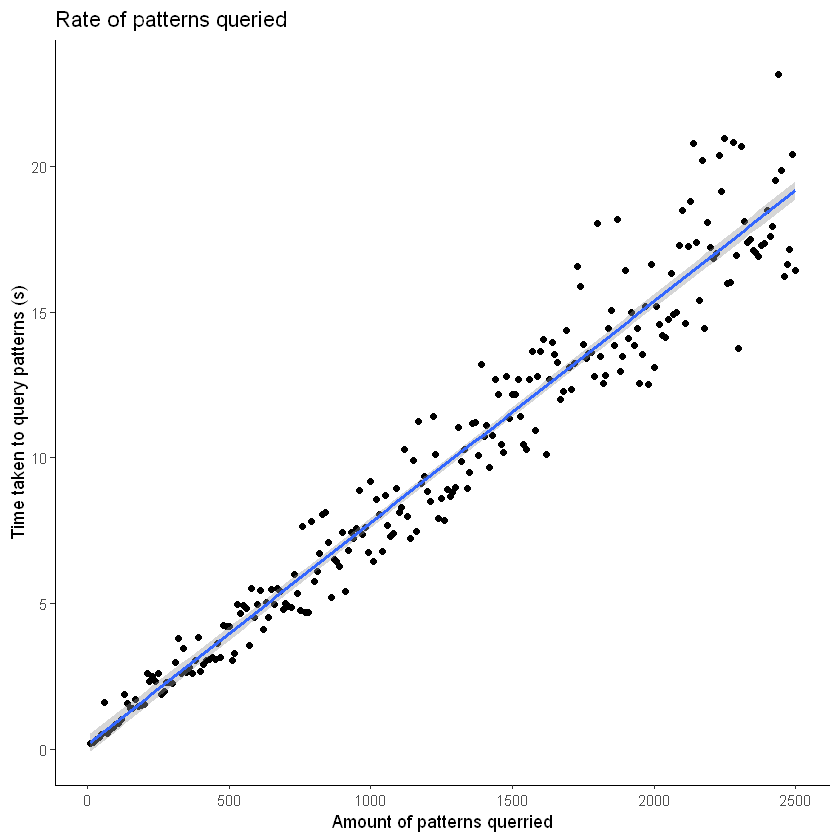

In [18]:
query_data <- data.frame((1:length(query_times))*10,query_times)
colnames(query_data)[1] <- "query_amount"

model <- lm(data = query_data, query_times ~ query_amount)
summary(model)

a <- model$coefficients[2] # slope
b <- model$coefficients[1] # intercept

ggplot(data = query_data, aes(x = query_amount,y=query_times)) +
    geom_point() + 
    geom_smooth(method = "lm") +
    xlab("Amount of patterns querried") +
    ylab("Time taken to query patterns (s)") +
    theme_classic() +
    labs(title = "Rate of querying")

Upon visualization there is a fairly linear trend with some variance change as the query rate goes larger. This variance can probably be found in the difference in computational power in my computer moment to moment. However the linear trend, as shown by the quick regression model I computed, is a good sign that there aren't any artificial constraints on the system to limit querying. Also given the equation found of time = .0068(amount) + .174 we can guess that querying one million patterns will take about 7600 seconds or 113 minutes which is about 2 hours. It would be optimal to just plug that amount into the search patterns feature but there seems to be an unofficial limit to the amount of patterns that can be referenced which I will talk about next.

#### Optimizing by Page Number

After completing a large number of queries, most often at or above 5000, there will be an error that says a json wasn't read. This implies that there is a hard limit to how many patterns can be searched in a single query. The logical solution is to do multiple queries with a set amount. In the search_patterns function there is another variable aside from page_size, which gives the number of results to retrieve, page gives which page to start one. Now the page size on the website averages to 48, however the page size of the query function is variable and is dependent on the amount of patterns being queried. However, this works in our favor as queries starting at different pages will always go by the page number for amount, meaning we can run as many queries as desired that will not overlap by keeping the amount per page consistent and using the next page. In this example we get Weekend hat being the last pattern of a 100 pattern page 1 and the first of a 99 pattern page 2. We are intentionally creating a lag here so that we can show the overlap, this would not happen if the page sizes were the same.

In [20]:
page_1 <- search_patterns(query = '',page_size = 100,page = 1)
page_2 <- search_patterns(query = '',page_size = 99,page = 2)
page_2_start <- page_2$name[1]
page_1_overlap <- page_1 %>% filter(name == page_2_start)

page_1_overlap

free,id,name,permalink,designer.id,designer.name,pattern_sources
<lgl>,<int>,<chr>,<chr>,<int>,<chr>,<list>
FALSE,1300588,Weekend Hat,weekend-hat-5,92889,PetiteKnit,", , , , , 258 , , Mette Wendelboe Okkels , 92889 , Okkels , , FALSE , 2016/10/26 09:41:37 -0400 , 6732810 , 0 , 0 , 0 , 11144 , , 2 , FALSE , FALSE , 215774 , , , petiteknit.com, Petite Knit , , , 2023/10/25 08:38:21 -0400 , 399411 , , 14 , , PetiteKnit Ravelry Store , FALSE , 7 , 262 , 4 , FALSE , petiteknit-ravelry-store , FALSE , 0 , 2147483647 , , , 0 , 0 , , , , , , , , 9 , 59482 , 2022/05/13 01:14:08 -0400 , https://www.ravelry.com/stores/petiteknit, ,"


#### Data Collection through Query

After condensing a way to give a max query by page I can estimate a total amount of data of 1000000 which I will now query. Based on the equation given this is expected to take around 2 hours of time give or take a few minutes due to the added time of merging data sets between steps. I'm looking here to gather one million data entries in stages of 2000 queries, so I will be running a 400 round for loop in order to accomplish this goal.

Inevitably however I ran into a different setback, the api actually only references up to the first 100,000 patterns which limits my sample size. As seen below it will not be able to return the final JSONs. With this being the case, I decided to settle with 100,000 patterns; an amount that is below optimal but will probably save me time in the long run.

In [7]:

query_start_time <- Sys.time()
for(i in 1:40){
    print(i)
    search_results <- search_patterns(query = '',page_size = 3000,page = i)
    if(i == 1){
        query_total <- search_results
    } else{
        query_total <- rbind(query_total,search_results)
    }
}
query_results_time <- Sys.time()

print(query_results_time - query_start_time)

print(head(query_total))

write.csv(query_total,"query_results.csv")

[1] 42


ERROR: Error: API did not return json


In [11]:
query_data <- query_total
library(jsonlite)
query_json <- toJSON(query_data)
validate(query_json)
write_json(query_json,"../data/query_data_raw.JSON")


[1] TRUE

After getting it all I wrote the data to a JSON file so I wouldn't have to run it again later.

As a part of the process I also completed the timely step of calculating the query time for each query. I may have over crashed my queries per day but I was having fun.

## Get Pattern Step

#### Pattern timing

Similar to the query time the pattern time tends to change with the amount of data so I will do a test run of timing for a possible optimization problem. I will again go by every 10 queries and will ignore the time taken to request the query. As this is a separate step in my real process I will not need to worry about batching it in the same amount as the queries.

In [13]:
pattern_times <- c()

search_results <- search_patterns(query = '',page_size = 2500)

for(i in 1:250){
  pattern_start_time <- Sys.time()
  get_patterns(id = search_results$id[1:i*10])
  pattern_results_time <- Sys.time()
  pattern_times <- c(pattern_times,pattern_results_time - pattern_start_time)
}


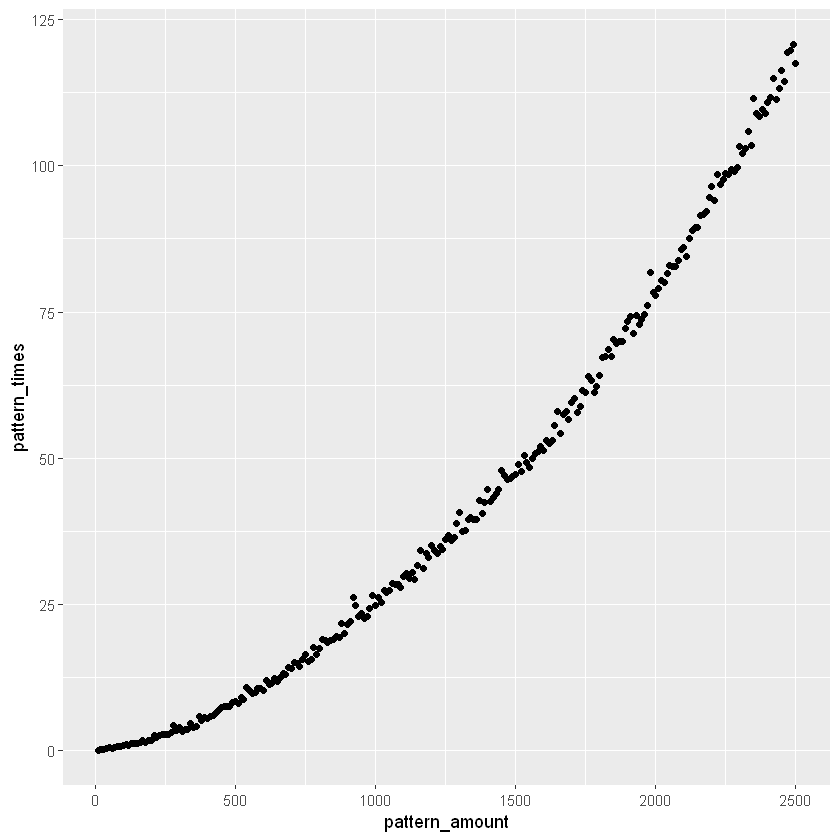

In [24]:

pattern_data <- data.frame((1:length(pattern_times))*10,pattern_times)
colnames(pattern_data)[1] <- "pattern_amount"

# When it took longer than a minute to get the patterns the response changed from seconds to minutes
# I changed it back here to keep units
pattern_data_adapt <- pattern_data

for(i in 1:250){
    if(pattern_data_adapt[i,2] < 3 & i >100){
        pattern_data_adapt[i,2] <- pattern_data_adapt[i,2] * 60
    }
}

ggplot(data = pattern_data_adapt, aes(x = pattern_amount,y= pattern_times)) + geom_point()

Looking at this data it seems as if there is a vague exponential distribution although the main takeaway is that finding the pattern information takes much more time than the individual queries. This would make it a much more limiting factor in my wild attempt for insane amounts of data. Luckily this trend wasn't actually too representative of the final amount of time and it was not long at all, but I still wanted to optimize and prepare for the conversion.

#### Pattern Optimization

Using the data from before we can do a quick test to see which point has the optimal ratio of amount to time. The units in this would be patterns per second and we are looking for the maximum number out of all of the tme pattern combos.

[1] 143.9332

,pattern_amount,pattern_times,pattern_ratio
,<dbl>,<dbl>,<dbl>
1,10,0.07591796,131.7211
2,20,0.14022303,142.6299
3,30,0.26294994,114.0902
4,40,0.30642605,130.5372
5,50,0.50406885,99.1928
6,60,0.41686010,143.9332
7,70,0.52426100,133.5213
8,80,0.63188291,126.6057
9,90,0.72974205,123.3313


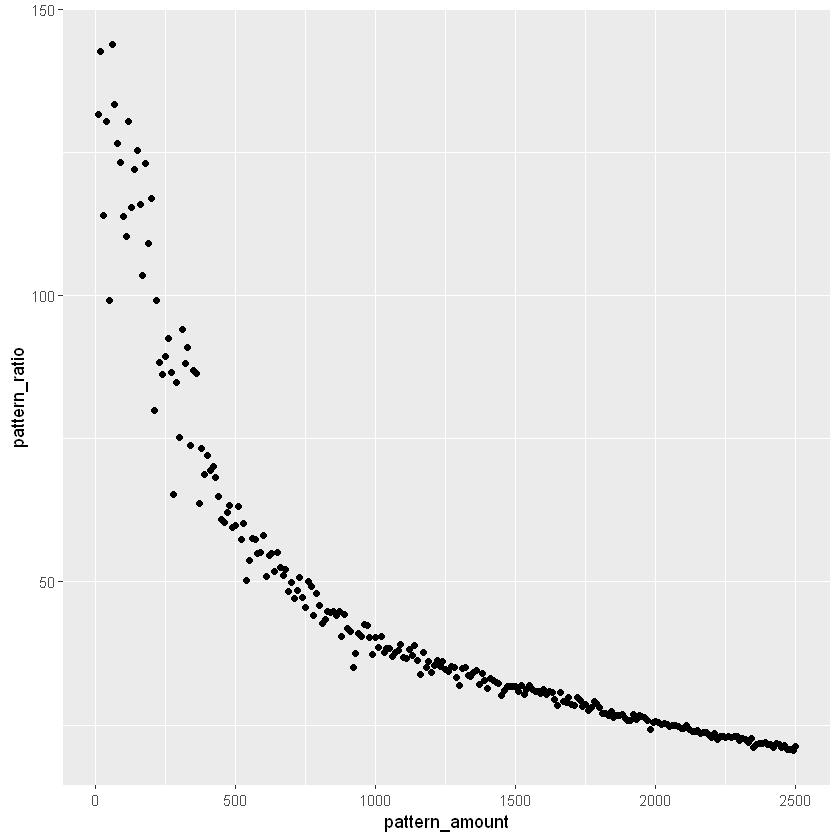

In [40]:
pattern_data_adapt$pattern_ratio = pattern_data_adapt$pattern_amount/pattern_data_adapt$pattern_times

max(pattern_data_adapt$pattern_ratio)
pattern_data_adapt[1:10,]
ggplot(data = pattern_data_adapt, aes(x = pattern_amount, y = pattern_ratio)) + geom_point()

With the data that I have it seems that a lower amount around 60-70 is actually the most efficient amount of patterns to get at a time. However, with it to make an even breakdown of the 100,000 patterns I'm going to break it into 80 pattern chunks. I'm not considering the amount of time that it takes to merge the resulting values with an rbind. I will worry about this later if I need to optimize further.

#### Pattern Collection Through Iterative Process

The next step after querying as much data as possible was using the built in get_patterns() function to get the pattern details I was interested in. If I'm patterning about 100,000 ids then in chunks of 80 with about .65 seconds a package then I will have a total time as follows:

$$
\frac{100000}{80}*.63188=789.85 \text{ seconds or } 13.16 \text{ minutes}
$$

In [ ]:
query_json <- read_json("../data/query_data_raw.JSON")

In [34]:
query_data <- fromJSON(query_json[[1]])

In [45]:

patterns_start_time <- Sys.time()
for(i in 0:1249){
  ## Some patterns did not return a value, this could be do to pattern deletion so a try statement is used
  pattern_inst <- try(get_patterns(ids = query_data$id[((i*80)+1):((i+1)*80)]))
  if(i == 0){
    pattern_data = pattern_inst
  } else if(i == 1){
    pattern_data <- rbind(pattern_data,pattern_inst)
  } else{
    pattern_data <- rbind(pattern_data,pattern_inst)
  }
}
patterns_end_time <- Sys.time()


print(patterns_end_time-patterns_start_time)


Error : API did not return json
Time difference of 5.218724 hours


So my estimates were wildly off, the patterns actually took around five hours in order to be unpacked, which left me with a set of data that has dimensions of 99921, 53 in comparison to the 100000, 7 of the query data. There is a difference of about 79 patterns as one of the queried pattern ids seemed to not have been present when trying to convert the ids to a pattern data. My belief is that this pattern was deleted between me querying the pattern ids and converting it into information.

In [52]:
dim(pattern_data)
dim(query_data)

[1] 99921    53

[1] 100000      7

## Writing the Data to my Computer using JSONlite

Anyhow, the next step, which I thought would be easier, would be to write the file to json and then read it in on the data cleaning slide. This proved to be more difficult than I thought for multiple reasons. For one, the files took 4-5 hours to write and read each which became impossible to deal with when the read function started erroring. I re-wrote and re-read the same files and got the same error which leads me to believe there will be a similar issue with one of the patterns corrupting the json when it is being written.

I would also like to mention that the reason I'm saving it in a JSON format is due to the presence of nested dataframes. This is because the nested dataframes have a lot of information which can't be stored in a csv format. I'm not sure if writing to csv is faster but I don't have as much of a choice if i'm doing the data cleaning to fix the nested dataframes in another page. So lets split off the text data and save that as a csv and then test the json limit. JSONlite does have parameters in the write and read functions to reduce the data but unnesting is half of what i do in the cleaning so I'm not going to worry about it. Also it may screw up the data and I don't care to take the time to test it.


In [53]:
colnames(pattern_data)

[1] "comments_count"          "created_at"             
 [3] "currency"                "difficulty_average"     
 [5] "difficulty_count"        "downloadable"           
 [7] "favorites_count"         "free"                   
 [9] "gauge"                   "gauge_divisor"          
[11] "gauge_pattern"           "generally_available"    
[13] "has_uk_terminology"      "has_us_terminology"     
[15] "id"                      "name"                   
[17] "pdf_url"                 "permalink"              
[19] "price"                   "projects_count"         
[21] "published"               "queued_projects_count"  
[23] "rating_average"          "rating_count"           
[25] "row_gauge"               "updated_at"             
[27] "url"                     "yardage"                
[29] "yardage_max"             "personal_attributes"    
[31] "sizes_available"         "product_id"             
[33] "currency_symbol"         "ravelry_download"       
[35] "download_location"       "pdf_in_library"         
[37] "volumes_in_library"      "gauge_description"      
[39] "yarn_weight_description" "yardage_description"    
[41] "pattern_needle_sizes"    "notes_html"             
[43] "notes"                   "languages"              
[45] "packs"                   "printings"              
[47] "craft"                   "pattern_categories"     
[49] "pattern_attributes"      "pattern_author"         
[51] "photos"                  "pattern_type"           
[53] "yarn_weight"

In [56]:
patterns_data_text <- pattern_data %>% select(c(notes_html,notes))
patterns_data_no_text <- pattern_data %>% select(-c(notes_html,notes))
colnames(patterns_data_text)
colnames(patterns_data_no_text)
dim(patterns_data_text)
dim(patterns_data_no_text)

[1] "notes_html" "notes"

[1] "comments_count"          "created_at"             
 [3] "currency"                "difficulty_average"     
 [5] "difficulty_count"        "downloadable"           
 [7] "favorites_count"         "free"                   
 [9] "gauge"                   "gauge_divisor"          
[11] "gauge_pattern"           "generally_available"    
[13] "has_uk_terminology"      "has_us_terminology"     
[15] "id"                      "name"                   
[17] "pdf_url"                 "permalink"              
[19] "price"                   "projects_count"         
[21] "published"               "queued_projects_count"  
[23] "rating_average"          "rating_count"           
[25] "row_gauge"               "updated_at"             
[27] "url"                     "yardage"                
[29] "yardage_max"             "personal_attributes"    
[31] "sizes_available"         "product_id"             
[33] "currency_symbol"         "ravelry_download"       
[35] "download_location"       "pdf_in_library"         
[37] "volumes_in_library"      "gauge_description"      
[39] "yarn_weight_description" "yardage_description"    
[41] "pattern_needle_sizes"    "languages"              
[43] "packs"                   "printings"              
[45] "craft"                   "pattern_categories"     
[47] "pattern_attributes"      "pattern_author"         
[49] "photos"                  "pattern_type"           
[51] "yarn_weight"

[1] 99921     2

[1] 99921    51

In [55]:
write.csv(patterns_data_text, "../data/patterns_data_text.csv")
## this did not take long enough to make it seem like the culprit for the long write time
## also for reference the total JSON with the text data was 1.96 GB

So, removing the text data and then writing the rest to CSV took absolutely no time at all. This gives me a better idea of splitting off the nested dataframes I'm interested in and then writing the rest out to a CSV, leaving the nested data frames for JSON to crunch. 

I will quickly do a time check to see if there is any idea of splitting apart the dataset into chunks like I did for the queries and patterns. I still believe that splitting the nested from the non nested is the best idea but I'd like to cover my bases.

In [59]:
json_times <- c()

for(i in 1:10){
  data <- patterns_data_no_text[1:((i+1)*10)]
  json_start_time <- Sys.time()
  json_test <- toJSON(data)
  write_json(json_test,"../data/json_test.JSON")
  json_results_time <- Sys.time()
  json_times <- c(json_times,json_results_time - json_start_time)
}



ERROR: Error in `[.data.frame`(patterns_data_no_text, 1:((i + 1) * 10)): undefined columns selected


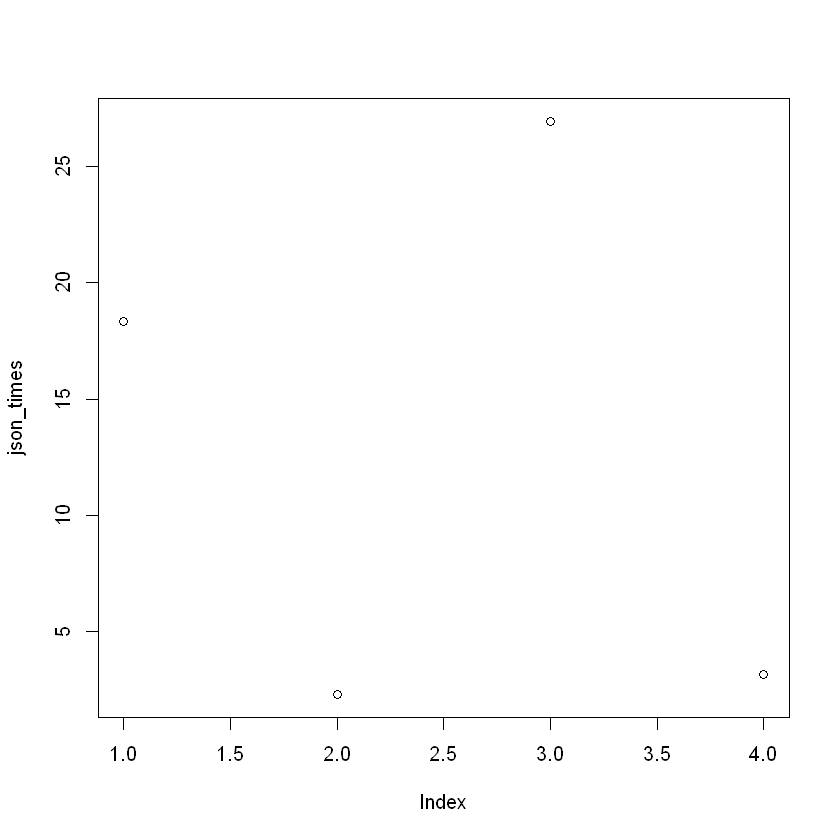

In [60]:
plot(json_times)

Yeah that doesn't help at all.

Anway, the splitting of the text data was so successful that I think that I will do the same for all of the non-nested data. I'll save all the non nested data to a csv and the nested data to a json file that hopefully will be easier to process. I will also use this chance to prune some of the nested dataframes I will not be using in my analysis. It is a bit of data cleaning but I've already done more work on this than I thought to it will hopefully be alright.

I will be separating the following nested columns:  
download_location  \
pattern_needle_sizes\
languages\
packs\
printings\
craft\
pattern_categories\
pattern_attributes\
pattern_author\
photos\
pattern_type\

Of which I will only keep:
pattern_needle_sizes\
craft\
pattern_categories\
pattern_attributes\
pattern_type\

The rest could be useful for future use but not for the analysis I intend to use.


In [62]:
patterns_to_csv <- patterns_data_no_text %>% select(-c(download_location,
    pattern_needle_sizes,
    languages,
    packs,
    printings,
    craft,
    pattern_categories,
    pattern_attributes,
    pattern_author,
    photos,
    pattern_type))

patterns_to_json <- patterns_data_no_text %>% select(c(pattern_needle_sizes,
    craft,
    pattern_categories,
    pattern_attributes,
    pattern_type))

In [63]:
write_csv(patterns_to_csv,"../data/patterns_to_csv.csv")

So writing that all to csv took five seconds while the json took 5 hours. I probably should have been doing this from the start.

In [65]:

patterns_json <- toJSON(patterns_to_json)
validate(patterns_json)
#write_json(patterns_json,"../data/pattern_data_raw.JSON")

[1] TRUE

In [69]:
## Here goes nothing
write_json(patterns_json,"../data/pattern_data_json.JSON")

And so after the hours it took to write the json of the full text, just doing it with the nested dataframes only took one second. I would have saved some of my sanity if I had done this from the start.

#### Summary of Situation

I'm hoping to optimize this process, going forward I'll use a lower amount of data to do a proof of concept data cleaning step without the full data I hope to analyze. Here is a quick sense of what we're working with. It's a bit messy as a JSON but the data cleaning should improve the outcome and look.

In [ ]:
#patterns_json <- read_json("../data/pattern_data_raw.JSON")
#prettify(patterns_json[[1]])

## Conclusion

Overall, I was left with a csv of raw pattern data with 99,979 entries. This process was a path of references and interest in order to collect the data. Next I will be processing the data by stripping unwanted variables and splitting tuples that exist within the dataframe structure. In the future I will continue to update my query optimization process to not overload the system and be able to maximize the amount of documents I receive in the process.
